# <center> Proyecto Barcelona - Comunas de Medellin

In [1]:
# LIBRERIAS
import pandas as pd
import numpy as np 

import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from mpl_toolkits import mplot3d 

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage  
 

In [2]:
df = pd.read_csv('Barca.csv', sep = ',', decimal = '.', header = 0)
print(df.shape)
df.head()

(16, 15)


,numero,nombre,zona,fundacion,superficie,habitantes,IDH,-14,15-39,40-64,65+,Mestizos-Blancos,Afro,indigenas,barrios
0,1,Popular,1,1960,2.300,122067,0.782,30.90,42.50,21.5,4.90,80.4,11.3,0.3,21
1,2,Santa cruz,1,1950,2.210,103212,0.803,31.10,42.90,21.0,4.90,87.6,12.3,0.1,11
2,3,Manrique,1,1940,5.495,148762,0.802,31.10,42.90,21.0,4.80,87.7,12.0,0.3,19
3,4,Aranjuez,1,1950,4.872,135167,0.839,31.00,42.90,21.0,4.90,89.8,10.1,0.1,14
4,5,Castilla,2,1930,6.100,142867,0.861,16.79,36.43,37.9,8.86,98.0,1.0,1.0,15


In [3]:
df.describe()

,numero,zona,fundacion,superficie,habitantes,IDH,-14,15-39,40-64,65+,Mestizos-Blancos,Afro,indigenas,barrios
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,15.000000,15.000000,16.00000
mean,8.500000,3.000000,1919.812500,4604.137438,151681.75000,0.859062,26.430625,42.014375,25.275000,6.053750,94.106667,4.833333,0.560000,16.75000
std,4.760952,1.712698,68.018839,18389.030631,77201.73095,0.055837,4.168190,1.866576,4.344882,1.372914,5.474547,4.593888,1.020364,4.78191
min,1.000000,1.000000,1675.000000,2.210000,84266.00000,0.782000,16.790000,36.430000,21.000000,4.100000,80.400000,0.000000,0.000000,7.00000
25%,4.750000,1.750000,1930.000000,4.626500,114363.75000,0.814500,23.800000,41.775000,21.400000,4.900000,91.350000,0.750000,0.100000,13.75000
50%,8.500000,3.000000,1938.000000,6.031500,133838.00000,0.847000,25.500000,42.300000,25.700000,5.900000,96.000000,3.900000,0.100000,17.00000
75%,12.250000,4.000000,1950.000000,7.808000,161991.00000,0.893750,30.450000,42.900000,27.350000,7.000000,97.500000,8.550000,0.300000,19.50000
max,16.000000,6.000000,1960.000000,73563.000000,410671.00000,0.979000,31.100000,44.400000,37.900000,8.860000,100.000000,12.300000,3.000000,25.00000


In [4]:
##
## Contar datos faltantes y eliminar los datos faltantes
##
df.isnull().sum()

numero              0
nombre              0
zona                0
fundacion           0
superficie          0
habitantes          0
IDH                 0
-14                 0
15-39               0
40-64               0
65+                 0
Mestizos-Blancos    1
Afro                1
indigenas           1
barrios             0
dtype: int64

In [5]:
df = df.fillna(df.mean())

In [6]:
##
## Contar datos faltantes y eliminar los datos faltantes
##
df.isnull().sum()

numero              0
nombre              0
zona                0
fundacion           0
superficie          0
habitantes          0
IDH                 0
-14                 0
15-39               0
40-64               0
65+                 0
Mestizos-Blancos    0
Afro                0
indigenas           0
barrios             0
dtype: int64

In [7]:
##
## Contar datos duplicados y eliminar los datos duplicados
##
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   numero            16 non-null     int64  
 1   nombre            16 non-null     object 
 2   zona              16 non-null     int64  
 3   fundacion         16 non-null     int64  
 4   superficie        16 non-null     float64
 5   habitantes        16 non-null     int64  
 6   IDH               16 non-null     float64
 7   -14               16 non-null     float64
 8   15-39             16 non-null     float64
 9   40-64             16 non-null     float64
 10  65+               16 non-null     float64
 11  Mestizos-Blancos  16 non-null     float64
 12  Afro              16 non-null     float64
 13  indigenas         16 non-null     float64
 14  barrios           16 non-null     int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 2.0+ KB


In [9]:
df.shape

(16, 15)

## Similitud

In [10]:
# data a manejar
y = df['numero']
X = df.copy()
X.drop(['numero', 'nombre'], axis = 1, inplace = True)

In [11]:
X.head()

,zona,fundacion,superficie,habitantes,IDH,-14,15-39,40-64,65+,Mestizos-Blancos,Afro,indigenas,barrios
0,1,1960,2.300,122067,0.782,30.90,42.50,21.5,4.90,80.4,11.3,0.3,21
1,1,1950,2.210,103212,0.803,31.10,42.90,21.0,4.90,87.6,12.3,0.1,11
2,1,1940,5.495,148762,0.802,31.10,42.90,21.0,4.80,87.7,12.0,0.3,19
3,1,1950,4.872,135167,0.839,31.00,42.90,21.0,4.90,89.8,10.1,0.1,14
4,2,1930,6.100,142867,0.861,16.79,36.43,37.9,8.86,98.0,1.0,1.0,15


In [12]:
# buscar el codo
Nc = range(1, 17)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

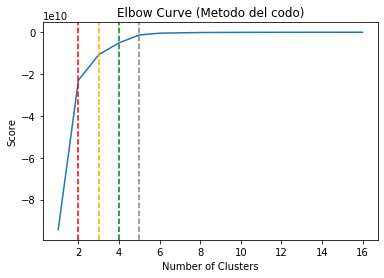

In [13]:
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.axvline(x = 2, color='red', linestyle='--')
plt.axvline(x = 3, color='orange', linestyle='--')
plt.axvline(x = 4, color='green', linestyle='--')
plt.axvline(x = 5, color='gray', linestyle='--')
plt.title('Elbow Curve (Metodo del codo)')
plt.show()

In [14]:
# ajuste de modelo con K = 2 
kmeans = KMeans(n_clusters = 2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.86666667e+00 1.93613333e+03 4.90954660e+03 1.34415800e+05
  8.51066667e-01 2.61726667e+01 4.21886667e+01 2.53333333e+01
  6.08400000e+00 9.38204444e+01 5.04888889e+00 5.97333333e-01
  1.63333333e+01]
 [5.00000000e+00 1.67500000e+03 2.30000000e+01 4.10671000e+05
  9.79000000e-01 3.03000000e+01 3.94000000e+01 2.44000000e+01
  5.60000000e+00 9.84000000e+01 1.60000000e+00 0.00000000e+00
  2.30000000e+01]]


In [15]:
# Predicting the clusters
labels = kmeans.predict(X)

In [16]:
data = {'numero': df['numero'], 'nombre': df['nombre'], 'prediccion': labels}
data = pd.DataFrame.from_dict(data)

In [17]:
data = data.set_index('nombre')
data

,numero,prediccion
nombre,,
Popular,1,0
Santa cruz,2,0
Manrique,3,0
Aranjuez,4,0
Castilla,5,0
Doce de Octubre,6,0
Robledo,7,0
Villa Hermosa,8,0
Buenos Aires,9,0


## Dendrogramas

In [18]:
linked = linkage(X, 'single')

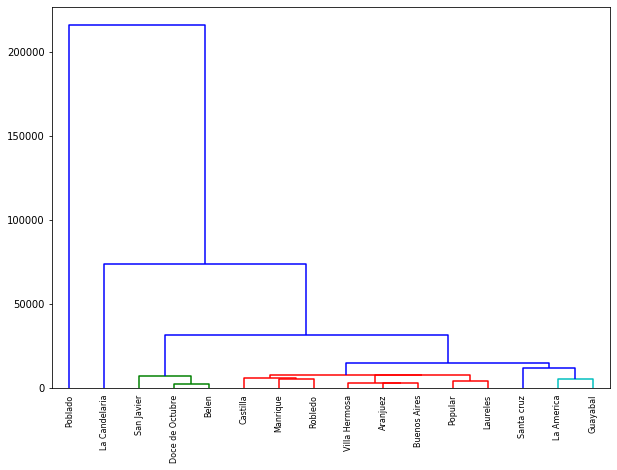

In [19]:
plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation = 'top',
            labels = data.index,
            distance_sort = 'descending',
            show_leaf_counts = True, 
            color_threshold = 10000,
            leaf_rotation = 90, 
            leaf_font_size = 8
          )
plt.savefig("figura.png")
plt.show()  

## PCA

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [21]:
df = pd.read_csv('Barca.csv', sep = ',', decimal = '.', header = 0)
df = df.fillna(df.mean())
# data a manejar
y = df['numero']
X = df.copy()
X.drop(['numero', 'nombre'], axis = 1, inplace = True)
X.head()

,zona,fundacion,superficie,habitantes,IDH,-14,15-39,40-64,65+,Mestizos-Blancos,Afro,indigenas,barrios
0,1,1960,2.300,122067,0.782,30.90,42.50,21.5,4.90,80.4,11.3,0.3,21
1,1,1950,2.210,103212,0.803,31.10,42.90,21.0,4.90,87.6,12.3,0.1,11
2,1,1940,5.495,148762,0.802,31.10,42.90,21.0,4.80,87.7,12.0,0.3,19
3,1,1950,4.872,135167,0.839,31.00,42.90,21.0,4.90,89.8,10.1,0.1,14
4,2,1930,6.100,142867,0.861,16.79,36.43,37.9,8.86,98.0,1.0,1.0,15


In [22]:
# Scale the data
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[3.82028851e-01 2.18177988e-01 1.16803100e-01 9.01853823e-02
 7.73578682e-02 5.82822292e-02 2.22852921e-02 1.77944654e-02
 8.62462665e-03 5.91617658e-03 2.20540957e-03 2.92296743e-04
 4.63143176e-05]


In [24]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.38202885 0.60020684 0.71700994 0.80719532 0.88455319 0.94283542
 0.96512071 0.98291518 0.9915398  0.99745598 0.99966139 0.99995369
 1.        ]


In [25]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components = 3))])

# Fit the pipeline to poke_df and transform the data
pc =  pipe.fit_transform(Xs)
print(pc)

[[-3.63231268 -0.09983856 -1.41654949]
 [-3.21658533 -0.62531449 -0.59518555]
 [-3.10849276  0.35684123 -0.82695629]
 [-2.60887416  0.03181475 -0.40318054]
 [ 4.04339286 -2.6142069  -1.20757333]
 [-1.17071738  0.36102685  3.44583708]
 [-1.70157855  1.41817726  0.5963448 ]
 [ 0.79249617 -0.52965859  0.39848054]
 [ 0.82924941 -0.81220107  2.05756088]
 [ 0.51986789 -1.06902178 -0.60065946]
 [ 1.52401522 -0.61254172 -0.41756205]
 [ 1.32599475 -1.08164343 -0.26423186]
 [ 0.49803216 -0.53959087 -0.93452336]
 [ 2.73324485  5.37350622 -0.90570162]
 [ 1.12743873 -1.00018362  0.79438892]
 [ 2.04482881  1.44283472  0.27951132]]


In [26]:
# Add the 2 components to poke_cat_df
X['PC 1'] = pc[:, 0]
X['PC 2'] = pc[:, 1]

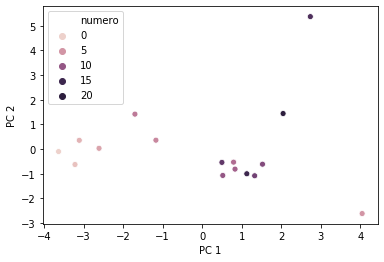

In [27]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data = X, 
                x = 'PC 1', y = 'PC 2', hue = y)
plt.show()

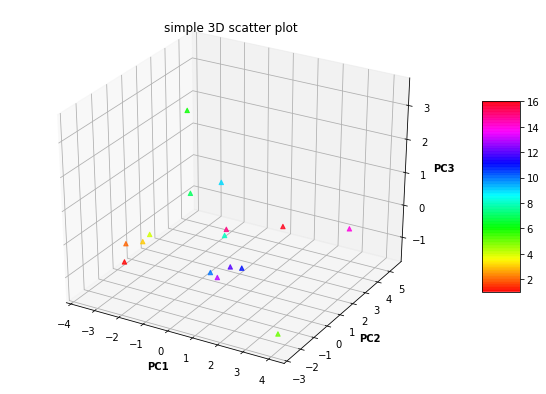

In [28]:
# Creating dataset 
X['PC 1'] = pc[:, 0]
X['PC 2'] = pc[:, 1]
X['PC 3'] = pc[:, 2]
  
# Creating figure 
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

# Add x, y gridlines  
ax.grid(b = True, color = 'grey',  
        linestyle = '-.', linewidth = 0.3,  
        alpha = 0.2)  

# Creating color map 
my_cmap = plt.get_cmap('hsv') 
  
# Creating plot 
sctt = ax.scatter3D(X['PC 1'], X['PC 2'], X['PC 3'], 
                    alpha = 0.8, 
                    c = y,  
                    cmap = my_cmap,  
                    marker = '^') 

plt.title("simple 3D scatter plot") 
ax.set_xlabel('PC1', fontweight ='bold')  
ax.set_ylabel('PC2', fontweight ='bold')  
ax.set_zlabel('PC3', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
  
# show plot 
plt.show() 

## Dendograma con sklearn

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
df = pd.read_csv('Barca.csv', sep = ',', decimal = '.', header = 0)
df = df.fillna(df.mean())
# data a manejar
y = df['numero']
X = df.copy()
X.drop(['numero', 'nombre'], axis = 1, inplace = True)
X.head()

,zona,fundacion,superficie,habitantes,IDH,-14,15-39,40-64,65+,Mestizos-Blancos,Afro,indigenas,barrios
0,1,1960,2.300,122067,0.782,30.90,42.50,21.5,4.90,80.4,11.3,0.3,21
1,1,1950,2.210,103212,0.803,31.10,42.90,21.0,4.90,87.6,12.3,0.1,11
2,1,1940,5.495,148762,0.802,31.10,42.90,21.0,4.80,87.7,12.0,0.3,19
3,1,1950,4.872,135167,0.839,31.00,42.90,21.0,4.90,89.8,10.1,0.1,14
4,2,1930,6.100,142867,0.861,16.79,36.43,37.9,8.86,98.0,1.0,1.0,15


In [31]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')  
y_pred = cluster.fit_predict(X) 
y_pred

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2], dtype=int64)

In [32]:
print(cluster.labels_)  

[0 0 0 0 0 2 0 0 0 0 0 0 2 1 0 2]


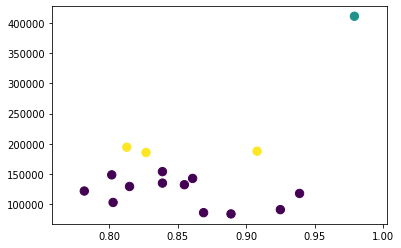

In [33]:
# Getting the values and plotting it
f1 = X['IDH'].values
f2 = X['habitantes'].values

plt.scatter(f1, f2,  s = 70, c = y_pred)
plt.show()